Dataset loaded and processed successfully.
        date    Tn    Tx  Tavg  RH_avg    RR   ss  ff_x  ddd_x  ff_avg  \
0 2010-01-01  21.4  30.2  27.1    82.0   9.0  0.5   7.0   90.0     5.0   
1 2010-02-01  21.0  29.6  25.7    95.0  24.0  0.2   6.0   90.0     4.0   
2 2010-03-01  20.2  26.8  24.5    98.0  63.0  0.0   5.0   90.0     4.0   
3 2010-04-01  21.0  29.2  25.8    90.0   0.0  0.1   4.0  225.0     3.0   
4 2010-05-01  21.2  30.0  26.7    90.0   2.0  0.4   NaN    NaN     NaN   

  ddd_car  station_id  Year  
0      E        96001  2010  
1      E        96001  2010  
2      E        96001  2010  
3      SW       96001  2010  
4     NaN       96001  2010  

--- Analyzing Temperature Trend ---
Estimated Annual Temperature Change: 0.0437 °C/year


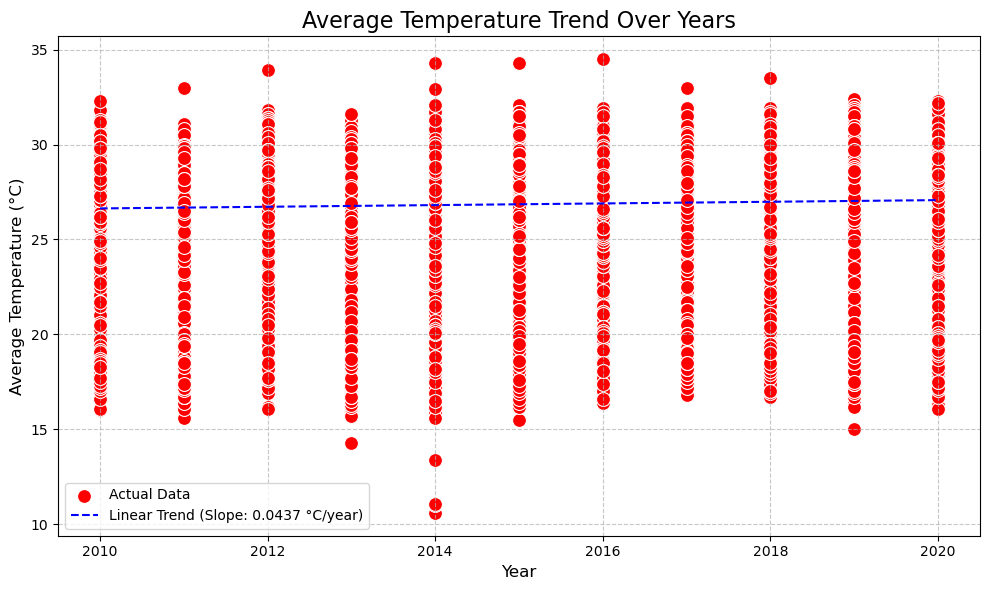

Generated 'temperature_trend_over_years.png'


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# --- Configuration ---
DATA_FILE = 'climate_data.csv'

# Updated column mapping based on actual CSV structure
COLUMN_MAPPING = {
    'year_col': 'Year',  # Extracted from 'date'
    'temp_anomaly_col': 'Tavg'  # Using average temperature as a proxy for anomaly
}

# --- Load and Prepare Data ---
try:
    df = pd.read_csv(DATA_FILE)
    df.columns = df.columns.str.strip()  # Remove leading/trailing whitespace

    # Convert 'date' column to datetime and extract year
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['Year'] = df['date'].dt.year

    # Drop rows with missing 'Year' or 'Tavg'
    df.dropna(subset=[COLUMN_MAPPING['year_col'], COLUMN_MAPPING['temp_anomaly_col']], inplace=True)

    if df.empty:
        raise ValueError("The dataset is empty after processing. Ensure 'date' and 'Tavg' have valid values.")

    # Ensure 'Year' is integer
    df[COLUMN_MAPPING['year_col']] = df[COLUMN_MAPPING['year_col']].astype(int)

    print("Dataset loaded and processed successfully.")
    print(df.head())

except FileNotFoundError:
    print(f"Error: The file '{DATA_FILE}' was not found.")
    exit()
except ValueError as e:
    print(e)
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

# --- Linear Regression: Temperature Trend Over Years ---
X = df[[COLUMN_MAPPING['year_col']]].values
y_temp = df[COLUMN_MAPPING['temp_anomaly_col']].values

print("\n--- Analyzing Temperature Trend ---")
model_temp = LinearRegression()
model_temp.fit(X, y_temp)
temp_slope = model_temp.coef_[0]
temp_intercept = model_temp.intercept_

print(f"Estimated Annual Temperature Change: {temp_slope:.4f} °C/year")

# --- Visualization ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=COLUMN_MAPPING['year_col'], y=COLUMN_MAPPING['temp_anomaly_col'], data=df, color='red', s=100, label='Actual Data')
plt.plot(X, model_temp.predict(X), color='blue', linestyle='--', label=f'Linear Trend (Slope: {temp_slope:.4f} °C/year)')
plt.title('Average Temperature Trend Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('temperature_trend_over_years.png')
plt.show()
print("Generated 'temperature_trend_over_years.png'")
